In [12]:
import pandas as pd

train_data = pd.read_csv(
    '../CSV/cropped_ROI/2_Label/HSV_GLCM/HSV_GLCM[all]3_Training.csv')
train_data

,label,H,S,V,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,contrast 0,contrast 45,contrast 90,contrast 135
0,1,70.491365,146.131599,118.506345,6.019468,6.586583,6.618336,6.382825,0.252521,0.236534,0.239697,0.247086,126.685695,138.195402,142.094522,141.058365
1,1,66.423919,154.251310,143.660672,7.320525,7.626076,7.513306,7.630156,0.228948,0.223263,0.219704,0.217576,190.119360,199.191130,181.156577,196.541220
2,1,74.244691,134.289072,123.039294,8.297130,8.421323,8.388427,8.517499,0.231795,0.227575,0.223844,0.224796,265.191731,267.567984,249.274582,266.451747
3,1,70.975499,151.072650,151.022464,6.976397,7.430790,6.878827,6.924531,0.258687,0.244756,0.264993,0.264255,189.897028,199.494130,179.157445,196.022307
4,1,68.137547,163.573762,125.183122,8.437577,8.883232,8.999434,9.081429,0.213950,0.205111,0.202471,0.203224,234.983152,249.762870,248.145047,260.613763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2,33.821085,149.434062,130.822165,7.953276,8.327284,7.928418,8.206594,0.264929,0.257819,0.269999,0.259612,197.842534,220.996873,197.619439,207.217919
76,2,47.834897,147.854200,138.396674,7.097532,7.457720,7.043413,7.454005,0.286754,0.273349,0.285111,0.276141,181.519157,202.175365,182.493403,199.728972
77,2,47.817260,147.850099,138.397156,7.097773,7.458188,7.043283,7.454281,0.286629,0.273257,0.285154,0.276186,181.515052,202.180626,182.497967,199.737398
78,2,63.815513,166.925279,150.204821,9.210033,9.522865,9.078645,9.574167,0.254794,0.246836,0.256639,0.246788,252.339612,267.356566,246.793403,274.061025


In [13]:
test_data = pd.read_csv(
    '../CSV/cropped_ROI/2_Label/HSV_GLCM/HSV_GLCM[all]3_Testing.csv')
test_data

,label,H,S,V,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,contrast 0,contrast 45,contrast 90,contrast 135
0,1,69.981349,142.061376,149.233507,6.682127,7.319608,7.327989,7.465772,0.283491,0.274078,0.276798,0.267769,195.477318,241.971510,243.841245,250.882822
1,1,69.665275,158.249980,102.894030,7.097314,7.730951,7.643792,7.597066,0.238388,0.222701,0.222084,0.221449,225.455626,253.826013,236.787187,240.078439
2,1,69.592622,147.545873,132.057484,6.410605,6.874760,6.639243,6.901406,0.275632,0.262367,0.264921,0.262736,192.021413,219.100121,195.217131,218.588717
3,1,64.876150,157.536487,134.308760,6.497907,6.931031,6.809134,6.809983,0.264359,0.253613,0.252817,0.252785,155.600689,171.593577,161.548542,165.416156
4,2,63.819199,166.916994,150.202575,9.209748,9.522559,9.078717,9.573869,0.254785,0.246814,0.256608,0.246787,252.326950,267.345561,246.775186,274.056676
5,2,63.537974,141.094607,116.589305,11.880808,12.112189,11.490472,12.496261,0.143499,0.142975,0.143535,0.130808,323.593349,343.954198,306.262539,348.005653
6,2,66.123330,169.095792,118.178723,9.553667,10.021898,9.174330,9.694710,0.182842,0.175005,0.185662,0.181064,276.954549,298.996055,257.578755,288.187656
7,2,62.955360,119.988428,145.669339,10.961392,11.111251,10.726096,10.937548,0.227822,0.223111,0.231829,0.225716,326.166946,336.996438,313.821520,323.829363


In [14]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [16]:
X_test = test_data.drop('label', axis=1)
y_true = test_data['label']

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2], dtype=int64)

In [18]:
X_test['label'] = y_pred
X_test

,H,S,V,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,contrast 0,contrast 45,contrast 90,contrast 135,label
0,69.981349,142.061376,149.233507,6.682127,7.319608,7.327989,7.465772,0.283491,0.274078,0.276798,0.267769,195.477318,241.971510,243.841245,250.882822,1
1,69.665275,158.249980,102.894030,7.097314,7.730951,7.643792,7.597066,0.238388,0.222701,0.222084,0.221449,225.455626,253.826013,236.787187,240.078439,1
2,69.592622,147.545873,132.057484,6.410605,6.874760,6.639243,6.901406,0.275632,0.262367,0.264921,0.262736,192.021413,219.100121,195.217131,218.588717,1
3,64.876150,157.536487,134.308760,6.497907,6.931031,6.809134,6.809983,0.264359,0.253613,0.252817,0.252785,155.600689,171.593577,161.548542,165.416156,1
4,63.819199,166.916994,150.202575,9.209748,9.522559,9.078717,9.573869,0.254785,0.246814,0.256608,0.246787,252.326950,267.345561,246.775186,274.056676,2
5,63.537974,141.094607,116.589305,11.880808,12.112189,11.490472,12.496261,0.143499,0.142975,0.143535,0.130808,323.593349,343.954198,306.262539,348.005653,2
6,66.123330,169.095792,118.178723,9.553667,10.021898,9.174330,9.694710,0.182842,0.175005,0.185662,0.181064,276.954549,298.996055,257.578755,288.187656,2
7,62.955360,119.988428,145.669339,10.961392,11.111251,10.726096,10.937548,0.227822,0.223111,0.231829,0.225716,326.166946,336.996438,313.821520,323.829363,2


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



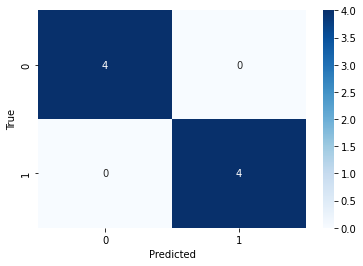

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [22]:
# import joblib

# # simpan model dalam file .pkl
# joblib.dump(model, '../Model/NB_Model_HSV_GLCM[all]3_2Label.pkl')

['../Model/NB_Model_HSV_GLCM[all]3_2Label.pkl']